##### Package Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns; sns.set(style='ticks', color_codes=True)
from sklearn.model_selection import train_test_split

##### Data import

In [2]:
dataset = pd.read_csv('data/Placement_Data_Full_Class.csv')
dataset.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


sl_no - Serial Number
 
ssc_p - Secondary Education Percentage - 10th Grade
 
ssc_b - Board of Education - Central/Others
 
hsc_p - Higher Secondary Education Percentage - 12th Grade
 
hsc_b - Board of Education - Central/Others
 
hsc_s - Specialization in Higher Secondary Education
 
degree_p - Degree Percentage
 
degree_t - Degree Type
 
workex - Work Experience
 
etest_p - Employability Test Percentage
 
specialistation - Post Graduation
 
mba_p - MBA Percentage
 
status - Status of Placement
 
salary - salary offered by corporate to candidates

##### Checking for missing values

In [3]:
print(dataset.isnull().sum())

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


As we can see, everything is in place except for 'salary' column
The problem is caused by the fact that not all of the students got jobs

##### Replacing missing values
We can safely replace the 'NaN' values with 0's, the  meaning behind the value is maintained and it will not interrupt the balance of the dataset.

In [4]:
# fill nan with 0's
dataset.fillna(value = 0, axis = 1, inplace = True)

##### Histograms
Let's dive in to the numerical attributes to check what we are dealing with

C:\Users\krzys\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krzys\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\krzys\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\krzys\Anaconda3\lib\site-packages\pandas\plotting\_matpl

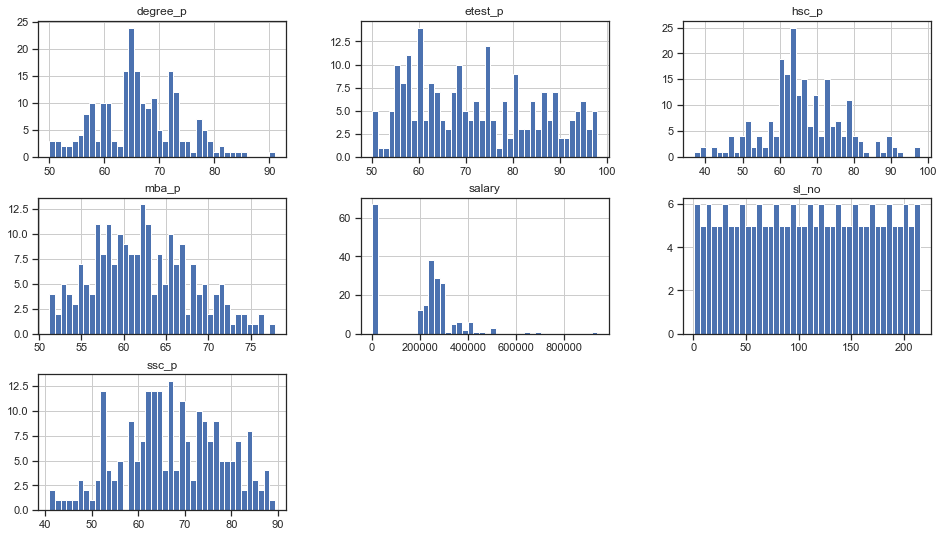

In [5]:
dataset.hist(bins = 40, figsize = (16, 9))
plt.show()

There does not seem to be any anomalies in the dataset. Everything is distributed correctly and nothing seems to have been modified beforehand. The test scores range from 30 to 100 which is perfectly fine. The only thing that may look odd is 'sl_no', however it is just a visual problem associated with the compression of the diagram.

##### Degree title distribution

In [6]:
dataset[dataset['status'] == "Placed"]['degree_t'].value_counts()

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

The majority of the people has graduated in Commercial Management, around one third of people graduated in Science & Technology and only 5 people have been assigned to 'Others' category. Unfortunately, there is no insights on what goes into it.

##### Visualisation of the distribtution

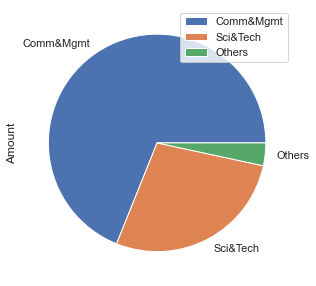

In [7]:
placement_data = pd.DataFrame(index=dataset[dataset['status'] == 'Placed']['degree_t'].value_counts().index)
placement_data['Amount'] = dataset[dataset['salary'] > 0]['degree_t'].value_counts().values
placement_data.plot.pie(y = 'Amount', figsize = (5, 5))

##### Is a degree title a significant feature?

In [8]:
dataset_working = dataset[dataset['status'] == 'Placed']
dataset_working.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.0,Mkt&Fin,62.14,Placed,252000.0


The 'dataset_working' contains only the entries of students who got jobs

In [9]:
# return the amount of people working from each degree_t category
working_scitech = len(dataset_working[dataset_working['degree_t'] == 'Sci&Tech']['degree_t'])
working_commmgmt = len(dataset_working[dataset_working['degree_t'] == 'Comm&Mgmt']['degree_t'])
working_others = len(dataset_working[dataset_working['degree_t'] == 'Others']['degree_t'])

# return each degree title and number of how many times it appears
degree_distrib = dataset['degree_t'].value_counts()

# calculate what percentage of people of each degree_t category got a job
working_scitech_placed_per = working_scitech / degree_distrib['Sci&Tech'] * 100
working_commmgmt_placed_per = working_commmgmt / degree_distrib['Comm&Mgmt'] * 100
working_others_placed_per = working_others / degree_distrib['Others'] * 100

print("Sci&Tech: ", '%.2f' % working_scitech_placed_per, "%")
print("Comm&Mgmt: ", '%.2f' % working_commmgmt_placed_per, "%")
print("Others: ", '%.2f' % working_others_placed_per, "%")

Sci&Tech:  69.49 %
Comm&Mgmt:  70.34 %
Others:  45.45 %


The results are as expected due to the fact that both Sci&Tech and Comm&Mgmt are  btoh vast and large industries.
Let's check if people from a particular group are smarter than people in other ones.

In [10]:
print(dataset.groupby('degree_t')['degree_p'].mean())

degree_t
Comm&Mgmt    66.203103
Others       60.666364
Sci&Tech     67.844237
Name: degree_p, dtype: float64


There's not much of a difference there, especially between Comm&Mgmt and Sci&Tech. It only supports the idea of these two titles being one of the main factors when recruiting a student.

##### How does specialisation affect recruitment?

In [11]:
specialisation_distrib = dataset['specialisation'].value_counts()
working_mkthr = len(dataset_working[dataset_working['specialisation'] == 'Mkt&HR'])
working_mktfin = len(dataset_working[dataset_working['specialisation'] == 'Mkt&Fin'])

working_mkthr_per = working_mkthr / specialisation_distrib['Mkt&HR'] * 100
working_mktfin_per = working_mktfin / specialisation_distrib['Mkt&Fin'] * 100
print("Mkt&HR:", '%.2f' % working_mkthr_per,  "%")
print("Mkt&Fin:", '%.2f' % working_mktfin,  "%")

Mkt&HR: 55.79 %
Mkt&Fin: 95.00 %


That's a big difference, almost everybody from Marketing and Finance got a job after they have graduated.

##### Visualisation of the specialisation analysis

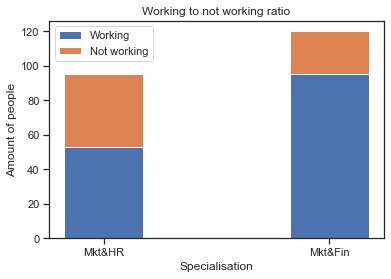

In [12]:
dataset_not_working = dataset[dataset['status'] == 'Not Placed']
not_working_mkthr = len(dataset_not_working[dataset_not_working['specialisation'] == 'Mkt&HR'])
not_working_mktfin = len(dataset_not_working[dataset_not_working['specialisation'] == 'Mkt&Fin'])

labels = ['Mkt&HR', 'Mkt&Fin']
working = [working_mkthr, working_mktfin]
not_working = [not_working_mkthr, not_working_mktfin]
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, working, width, label='Working')
ax.bar(labels, not_working, width, bottom=working,
       label='Not working')

ax.set_ylabel('Amount of people')
ax.set_xlabel('Specialisation')
ax.set_title('Working to not working ratio')
ax.legend()

plt.show()

##### How important the test scores are?
In order to check it, we will plot score for each test and differentiate between the employed and unemployed students

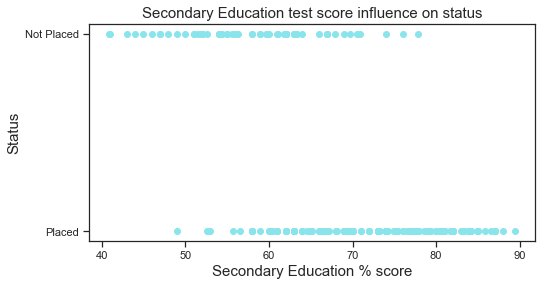

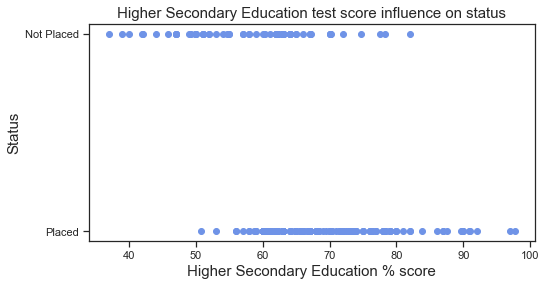

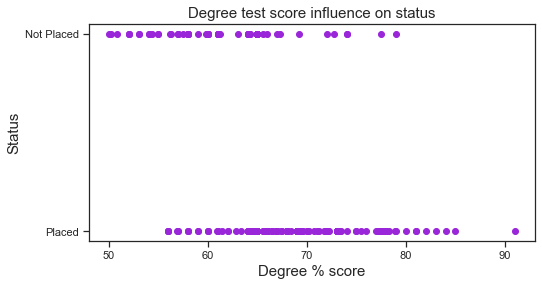

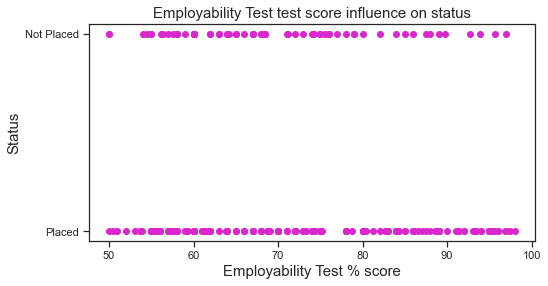

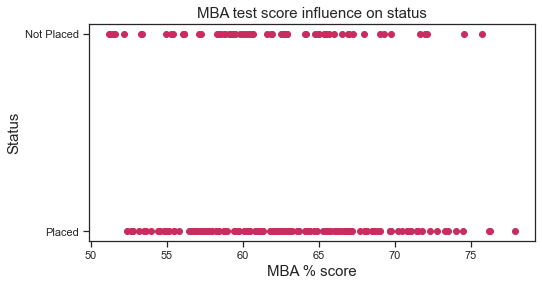

In [33]:
percentage_data = dataset[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'status', 'workex']]
columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
names = ['Secondary Education', 'Higher Secondary Education', 'Degree', 'Employability Test', 'MBA']
colours = ['#89e5eb', '#6f93e7', '#9a26d9', '#d926cd', '#c92c5e', '#d12e2e']

for i, column in enumerate(columns):
    plt.figure(figsize = (8, 4))
    plt.scatter(x = percentage_data[column], y = percentage_data['status'], c = colours[i])
    plt.title(f'{names[i]} test score influence on status', fontsize = 15)
    plt.xlabel(f'{names[i]} % score', fontsize = 15)
    plt.ylabel('Status', fontsize = 15)
    plt.show()

Seems like the Secondary Education, Higher Secondary Education and Degree Thesis scores are the most descriptive ones. It looks like there is some kind of linear correlation with the chance of getting a job. Let's take a mean of these three scores and see if we can improve said relation.

C:\Users\krzys\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


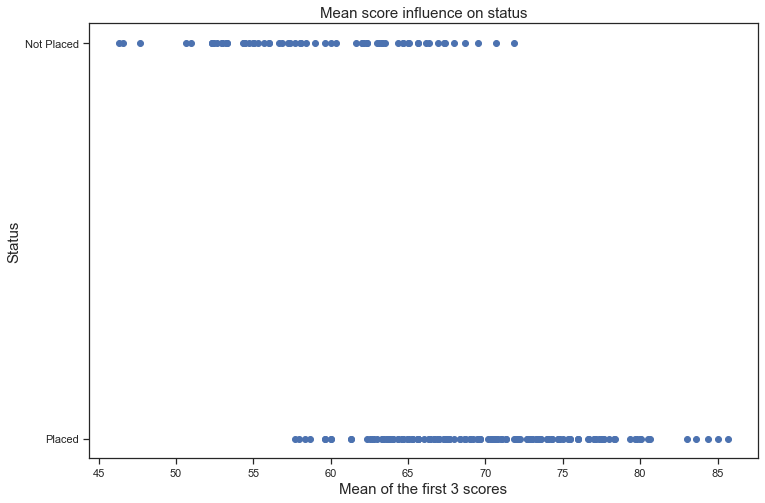

In [15]:
percentage_data['mean_of_score'] = percentage_data[['ssc_p', 'hsc_p', 'degree_p']].mean(axis = 1)

plt.figure(figsize = (12, 8))
plt.scatter(x = percentage_data['mean_of_score'], y = percentage_data['status'])
plt.title('Mean score influence on status', fontsize = 15)
plt.xlabel('Mean of the first 3 scores', fontsize = 15)
plt.ylabel('Status', fontsize = 15)
plt.show()

The plot looks decent however, there is not much of a difference from the Higher Education score plot. Unfortunately, it cannot help us to differentiate working and non-working students.

##### Is previous working experience valuable?
Let's list the number of how many people has/has not got a job experience

In [16]:
people_placed = dataset[dataset['salary'] > 0]
print('Has experience:')
people_placed['workex'].value_counts()

Has experience:


No     84
Yes    64
Name: workex, dtype: int64

In [17]:
workex_job_p = len(dataset[(dataset['workex'] == 'Yes') & (dataset['status'] == "Placed")]) / len(dataset[dataset['workex'] == 'Yes']) * 100
no_workex_job_p = len(dataset[(dataset['workex'] == 'No') & (dataset['status'] == "Placed")]) / len(dataset[dataset['workex'] == 'No']) * 100
print("People with previous work experience had:", '%.2f' % workex_job_p, "% chance of getting hired")
print("People without previous work experience had:", '%.2f' % no_workex_job_p, "% chance of getting hired")

People with previous work experience had: 86.49 % chance of getting hired
People without previous work experience had: 59.57 % chance of getting hired


As we can see, having working experience valued by the employers.

## Taks from Kaggle

##### 1. Use 'degree_p' as a feature to predict 'mba_p'  and analyse the coefficient.
Firstly, we will separate the features from labels

In [18]:
X_1 = dataset['degree_p']
y_1 = dataset['mba_p']

# N long scalar array to N x 1 matrix
X1 = np.array(X_1).reshape(-1, 1)
y1 = np.array(y_1).reshape(-1, 1)

Secondly, we will split the data into train and test sets

In [19]:
X1_test, X1_train, y1_test, y1_train = train_test_split(X1, y1, train_size=0.25)
print("X1_train.shape", X1_train.shape, "X1_test.shape", X1_test.shape)
print("y1_train.shape", y1_train.shape, "y1_test.shape", y1_test.shape)

X1_train.shape (162, 1) X1_test.shape (53, 1)
y1_train.shape (162, 1) y1_test.shape (53, 1)


Lastly, we will train the Linear Regression model

In [20]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(X1_train, y1_train)
y_pred = lin_reg.predict(X1_test)

mse = mean_squared_error(y1_test, y_pred)
rmse = np.sqrt(mse)
print(f"MSE: {'%.3f' % mse}")
print(f"RMSE: {'%.3f' % rmse}")

MSE: 23.712
RMSE: 4.869


The Mean Squared Error seems to be quite high, considering the range of test scores.
Let's look at the plots.

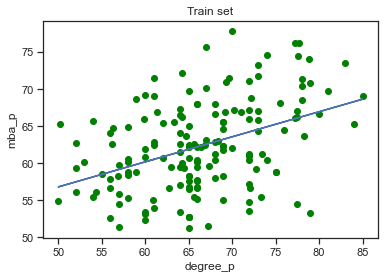

In [21]:
# Visualising train set
plt.figure()
plt.scatter(x=X1_train, y=y1_train, c='green')
plt.plot(X1_train, lin_reg.predict(X1_train))
plt.xlabel('degree_p')
plt.ylabel('mba_p')
plt.title('Train set')
plt.show()

It's obvious now why the Linear Regression has not performed well. The data has low linear dependency, it is spread all around the plot. Let's look at the validation data.

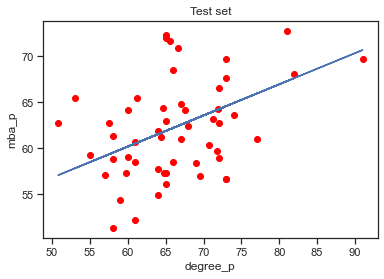

In [22]:
# Visualising test set
plt.figure()
plt.scatter(x=X1_test, y=y1_test, c='red')
plt.plot(X1_test, lin_reg.predict(X1_test))
plt.xlabel('degree_p')
plt.ylabel('mba_p')
plt.title('Test set')
plt.show()

Let's analyse the coefficient and see how small it is.

In [23]:
print(f"Coefficient: {lin_reg.coef_[0][0]}")
# pretty low coefficient, low linear dependency

Coefficient: 0.3383760155659291


As we can see, the coefficient is only 0.34, which means that a linear model like Linear Regression cannot perform well on this kind of data.

##### 2. Use Multiple Linear Regression to forecast 'mba_p' using 'ssc_p' and 'hsc_p' as features. Write down the equation of it.

In [24]:
# get data
data_task = dataset[['ssc_p', 'hsc_p', 'mba_p']]
X2 = np.array(data_task.iloc[:,:2])
y2 = np.array(data_task.iloc[:, 2])

# train test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25)
lin_reg = LinearRegression(n_jobs=-1)

# fit features and labels
lin_reg.fit(X2_train, y2_train)
y2_pred = lin_reg.predict(X2_test)

print("y = ssc_p *", "%.2f" % lin_reg.coef_[0], " + hsc_p *", "%.2f" % lin_reg.coef_[1], "+", "%.2f" % lin_reg.intercept_)

y = ssc_p * 0.16  + hsc_p * 0.10 + 44.70


Both ssc_p's and hsc_p's coefficients are low, close to 0 which basically means that there is almost no linear dependency between the features. 

### 3. Plotting tasks

##### 3.1. Histogram of degree_p

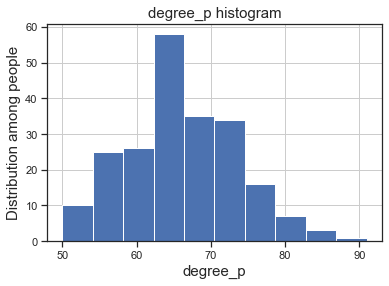

In [26]:
plt.figure()
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Distribution among people', fontsize=15)
plt.title('degree_p histogram', fontsize=15)
dataset['degree_p'].hist()

In [38]:
dataset['degree_p'].mean()

66.37018604651163

As expected, most of the poeple has scored between ~55% - ~75% and the average being 66%.

##### 3.2. Histogram of degree_p with status differentiation

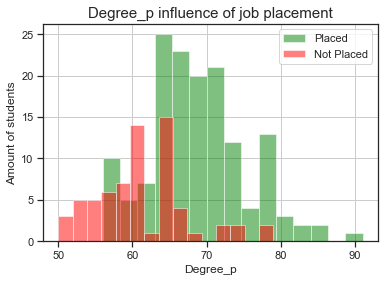

In [27]:
plt.figure()
dataset[dataset['status'] == 'Placed']['degree_p'].hist(color='green', bins=15, alpha=0.5, label='Placed')
dataset[dataset['status'] == 'Not Placed']['degree_p'].hist(color='red', bins=15, alpha=0.5, label='Not Placed')
plt.title('Degree_p influence of job placement', fontsize=15)
plt.xlabel('Degree_p')
plt.ylabel('Amount of students')
plt.legend()
plt.show()

From this plot we can see that the vast majority of people who scored more than ~65% in the 'degree_p' category got a job, which could mean that reaching the score above the average is a quite significant factor.

##### 3.3 Histogram of degree_p with status and gender differentiation

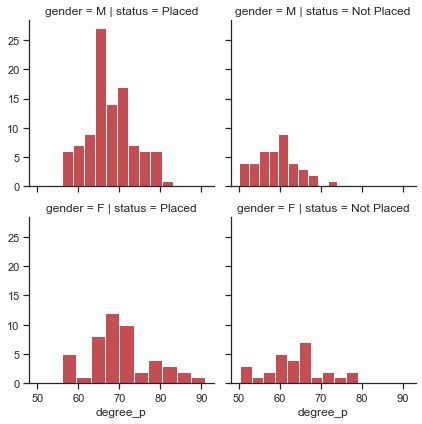

In [28]:
grid = sns.FacetGrid(dataset, col='status', row='gender')
grid = grid.map(plt.hist, 'degree_p', color='r')

In [43]:
print("Average of scores of women who got jobs:", dataset_working[dataset_working['gender'] == 'F']['degree_p'].mean())
print("Average of scores of men who got jobs:", dataset_working[dataset_working['gender'] == 'M']['degree_p'].mean())

Average of scores of women who got jobs: 70.596875
Average of scores of men who got jobs: 67.84949999999999


There is not much to say about this chart, apart from the lades reaching the highest scores and both groups having pretty much the same average scores.

##### 3.4. Boxplot for degree_p differentiating status and gender

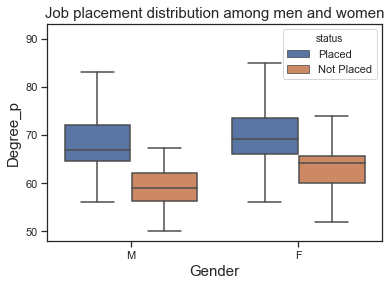

In [29]:
boxplot_data = dataset[['gender', 'status', 'degree_p']]
plt.figure()
sns.boxplot(x='gender', y='degree_p', hue='status', 
            hue_order=['Placed', 'Not Placed'], data=boxplot_data, fliersize=0)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Degree_p', fontsize=15)
plt.title('Job placement distribution among men and women', fontsize=15)
plt.show()

Not much here either, the only noticeable distinction is between women and men who did not get jobs. The median of women's scores in that case is 5% higher than men's.

##### 3.5. Introduce workex and gender

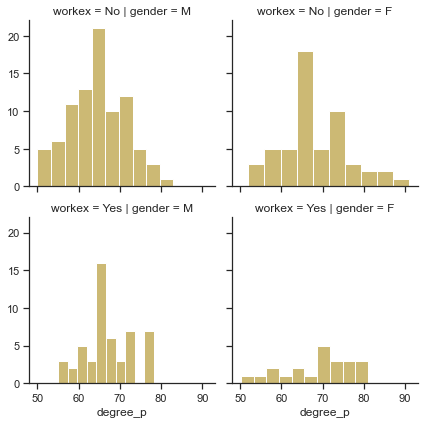

In [44]:
grid = sns.FacetGrid(dataset, col='gender', row='workex')
grid = grid.map(plt.hist, 'degree_p', color='y')

We can see that having working experience does not influence the 'degree_p' that much. It looks like it tends to slightly increase it, but not significantly. It is difficult to say without having more samples.

##### 3.6. Draw a density plot for 'degree_p'

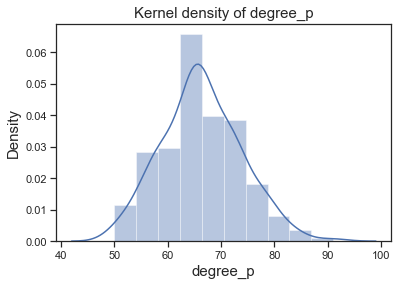

In [31]:
plt.figure()
sns.distplot(a=dataset['degree_p'], bins=10)
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Kernel density of degree_p', fontsize=15)
plt.show()

##### 3.7. Beautify the plot 

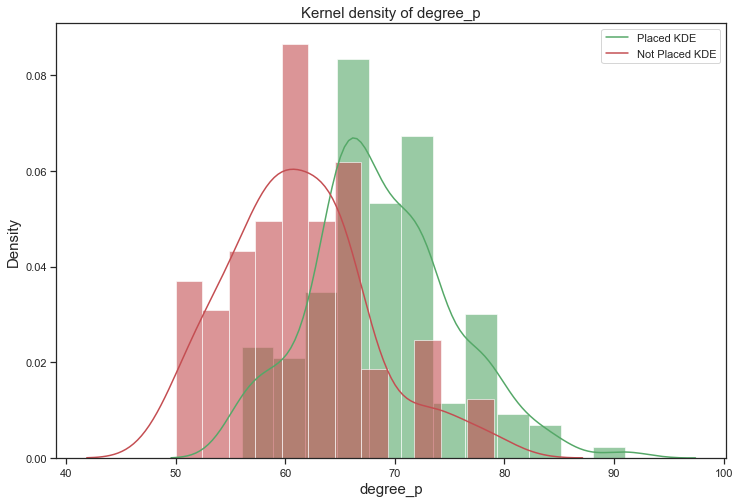

In [32]:

plt.figure(figsize=(12, 8))
sns.distplot(a=dataset[dataset['status'] == 'Placed']['degree_p'], bins=12,
             kde_kws={'color': 'g', 'label': 'Placed KDE'},
             hist_kws={'color': 'g', 'alpha': 0.6})
sns.distplot(a=dataset[dataset['status'] == 'Not Placed']['degree_p'], bins=12,
             kde_kws={'color': 'r', 'label': 'Not Placed KDE'},
             hist_kws={'color': 'r', 'alpha': 0.6})
plt.xlabel('degree_p', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Kernel density of degree_p', fontsize=15)
plt.show()